(unit4.5)=
# Unit 4.5: Using Laplace Transforms for Circuit Analysis

The preparatory reading for this section is [Chapter 4](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?docID=3384197&ppg=101) {cite}`karris` which presents examples of the applications of the Laplace transform for electrical solving circuit problems. Much of the same material is covered in [Section 3.7 D](https://www.accessengineeringlibrary.com/content/book/9781260454246/toc-chapter/chapter3/section/section36) of {cite}`schaum`.

## Agenda

We look at applications of the Laplace Transform for circuit analysis. In particular we will consider

* {ref}`circuit_transforms`

* {ref}`complex_impedance`

* {ref}`complex_admittance`

* {ref}`examples12`

Follow along at [cpjobling.github.io/eg-150-textbook/laplace_transform/5/circuit_analysis](https://cpjobling.github.io/eg-150-textbook/laplace_transform/5/circuit_analysis)

![QR Code for this lecture](pictures/qrcode_laplace5.png)

In [1]:
% initialize MATLAB
clearvars
syms t L R C i_R(t) v_R(t) i_L(t) v_L(t) v_C(t) i_C(t)

(circuit_transforms)=
## Circuit Transformation from Time to Complex Frequency

(resistive_network}=
### Time Domain Model of a Resistive Network

Consider {numref}`fig:res_circ_t`

:::{figure-md} fig:res_circ_t

<img src="pictures/resistive_time.png" alt="Time Domain Model of a Resistive Network." width="60%">

Time Domain Model of a Resistive Network.
:::

#### In the time domain

In {numref}`fig:res_circ_t` the voltage across the resistor $v_R(t)$ is proportional to the current flowing through the resistor $i_R(t)$

$$v_R(t) = R i_R(t)$$ (eq:vrt)

In [2]:
eqvrt = v_R(t) == R * i_R(t)

eqvrt =
 


v_R(t) == R*i_R(t)


The current flowing through the resistor is inversely proportional to the voltage across the resistor. This is easily confirmed by rewriting {eq}`eq:vrt` to isolate $i_R(t)$

In [3]:
eqirt = isolate(eqvrt,i_R(t))

eqirt =
 


i_R(t) == v_R(t)/R


Rewritten nicely as

$$i_R(t) = \frac{v_R(t)}{R}$$ (eq:irt)

From these results, which of the following equations represent the Laplace transform of the current flowing through, and the voltage across, the resistor $R$?

$$V_R(s) = RI_R(s)$$

$$I_R(s) + \frac{V_R(s)}{R}$$
    
$$V_R(s) = \frac{I_R(s)}{R}$$
    
$$I_R(s) = RV_R(s)$$

**-> Open poll**

#### In the complex frequency domain

We take the Laplace transforms of {eq}`eq:vrt` and {eq}`eq:irt` to obtain

$$V_R(s) = R I_R(s)$$ (eq:Vrs)

$$I_R(s) = \frac{V_R(s)}{R}$$ (eq:Irs)

which we illustrate in {numref}`fig:res_circ_s`.

```{note}
The current and voltage are transformed but the resitance is unchanged by the transformation.
```

(complex_resistive_network)=
###  Complex Frequency Domain Model of a Resistive Circuit

:::{figure-md} fig:res_circ_s
<img src="pictures/resistive_freq.png" alt="Complex Frequency Domain Model of a Resistive Circuit" width="60%">

Complex Frequency Domain Model of a Resistive Circuit
:::

(inductive_network)=
###  Time Domain Model of an Inductive Network

Consider {numref}`fig:ind_circ_t`

:::{figure-md} fig:ind_circ_t

<img src="pictures/inductive_time.png" alt="Time Domain Model of a Resistive Network." width="60%">

Time Domain Model of an Inductive Network.
:::

#### In the time domain

The voltage across the inductor $i_L(t)$ is proportional to the rate of change of the current $i_L(t)$ flowing through the inductor 

$$v_L(t) = L \frac{d}{dt} i_L(t) $$ (eq:vlt)

In [4]:
eqvlt = v_L(t) == L*diff(i_L(t))

eqvlt =


v_L(t) == L*diff(i_L(t), t)


The current flowing through the inductor is inversely proportional to the integral of the voltage across the inductor which is easily confirmed by taking the integral of both sides of {eq}`eq:vlt` and rewriting the equation to isolate $i_L(t)$

In [5]:
int(lhs(eqvlt)) == int(rhs(eqvlt));
eqilt = isolate(ans,i_L(t))

eqilt =


i_L(t) == int(v_L(t), t)/L


Rewritten nicely as

$$i_L(t) = \frac{1}{L}\int_{-\infty}^{t} v_L(t)\, dt$$ (eq:ilt)

From these results, which of the following equations represent the Laplace transform of the current flowing through, and the voltage across, the inductor $L$?

$$I_L(s)=sLV_L(s) - Lv_L(0^-)$$

$$I_L(s)=\frac{V_L(s)}{sL} + \frac{v_L(0^-)}{s}$$

$$V_L(s) = sLI_L(s) - Li_L(0^-)$$

$$V_L(s)=\frac{I_L(s)}{sL} + \frac{i_L(0^-)}{s}$$

**-> Open poll**

(complex_inductive_network)=
### Complex Frequency Domain Model of an Inductive Network 

Consider {numref}`fig:ind_circ_s`

:::{figure-md} fig:ind_circ_s

<img src="pictures/inductive_freq.png" alt="Time Domain Model of a Resistive Network." width="60%">

Time Domain Model of a Resistive Network.
:::

#### In the complex frequency domain

We take the Laplace transforms of {eq}`eq:vlt` and {eq}`eq:ilt` to obtain

$$V_L(s) = s L I_L(s) - Li_L(0^-)$$ (eq:Vls)

$$I_L(s) = \frac{V_L(s)}{sL} + \frac{i_L(0^-)}{s}$$ (eq:Ils)

```{note}
The current and voltage are transformed but so is the inductance. The complex frequency representation has used the derivative property for the voltage across the inductor and the integration properties for the current through the inductor. The use of the dervative and integration transforms has introduced a term that depends on the initial current flowing through the inductor. Therefore, the initial current would need to be considered in computing the actual voltage and current in the complex frequency domain.
```

(capacitive_network)=
### Time Domain Model of a Capacitive Network

Consider {numref}`fig:cap_circ_t`

:::{figure-md} fig:cap_circ_t

<img src="pictures/capacitive_time.png" alt="Time Domain Model of a Resistive Network." width="60%">

Time Domain Model of a Capacitive Network.
:::

#### In the time domain

The current flowing into the capacitor is proportional to the change in voltage across the capacitor

$$i_C(t) = C \frac{d}{dt} v_C(t) $$ (eq:ict)

In [6]:
eqict = i_C(t) == C * diff(v_C(t))

eqict =


i_C(t) == C*diff(v_C(t), t)


The voltage across the capacitor is inversely proportional to the integral of the current flowing into the capacitor which is easily confirmed by taking the integral of both sides of {eq}`eq:ict` and rewriting the equation to isolate $v_C(t)$

In [7]:
int(lhs(eqict)) == int(rhs(eqict));
eqvct = isolate(ans,v_C(t))

eqvct =


v_C(t) == int(i_C(t), t)/C


Which can be rwritten nicely as 

$$v_C(t) = \frac{1}{C}\int_{-\infty}^{t} i_C(t)\, dt$$ (eq:vct)

From the previous results, which of the following equations represent the Laplace transform of the current flowing into, and the voltage across, the capacitor $C$?

$$V_c(s)=sCI_C(s) - Ci_C(0^-)$$

$$I_c(s) = sCV_C(s) - Cv_C(0^-)$$

$$V_c(s) = \frac{I_C(s)}{sC} + \frac{i_C(0^-)}{s}$$

$$I_c(s)=\frac{V_C(s)}{sC} + \frac{v_C(0^-)}{s}$$

**-> Open poll**

#### In the complex frequency domain

We take the Laplace transforms of {eq}`eq:ict` and {eq}`eq:vct` to obtain

$$I_C(s) = s C V_C(s) - C v_C(0^-)$$ (eq:Ics)

$$V_C(s) = \frac{I_C(s)}{sC} + \frac{v_C(0^-)}{s}$$ (eq:Vcs)


```{note}
The current and voltage are transformed but so is the capacitance. The complex frequency representation has used the derivative property for the voltage across the capacitor and the integration property for the current flowing into the capacitor. The use of the dervative and integration transforms has introduced a term that depends on the initial voltage (initial charge) across the capacitor. Therefore, the initial voltage would need to be considered in computing the actual voltage and current introduced by the capacitor in the complex frequency domain.
```

### Complex Frequency Domain of a Capacitive Network

Consider {numref}`fig:cap_circ_s`

:::{figure-md} fig:cap_circ_s

<img src="pictures/capacitive_freq.png" alt="Time Domain Model of a Resistive Network." width="60%">

Time Domain Model of a Capacitive Network.
:::

(complex_impedance)=
## Complex Impedance $Z(s)$

By analogy with the *resistance* of a resistor $R$, a component with complex impedance $Z(s)$ satisfies Ohm's law:

$$V(s) = I(s) Z(s)$$

from which

$$Z(s) = \frac{V(s)}{I(s)}$$

(complex_impedance_comps)=
### Complex impedance of components

For the resistance $R$$\Omega$, inductance $L$H and capacitance $C$F, which of the following represent the complex impedance, $Z(s) = V(s)/I(s)$ of the components?

$$sL$$

$$1/R$$

$$sC$$

$$\frac{1}{sC}$$

$$\frac{1}{sL}$$

$$R$$

**-> Open Poll**

Consider the $s$-domain RLC series circuit shown in {numref}`fig:complex_imp`, where the initial conditions are assumed to be zero.

:::{figure-md} fig:complex_imp

<img src="pictures/impedence.png" alt="RLC series circuit." width="60%">

RLC series circuit
:::

For this circuit, the sum

$$R + sL + \frac{1}{sC}$$ 

represents that total opposition to current flow.

Then,

$$I(s) = \frac{V_s(s)}{R + sL + 1/(sC)}$$

and defining the ratio $V_s(s)/I(s)$ as $Z(s)$, we obtain

$$Z(s) = \frac{V_s(s)}{I(s)} = R + sL + \frac{1}{sC}$$

The $s$-domain current $I(s)$ can be found from 

$$I(s) = \frac{V_s(s)}{Z(s)}$$

where

$$Z(s) = R + sL + \frac{1}{sC}.$$

Since $s = \sigma + j\omega$ is a complex number, $Z(s)$ is also complex and is known as the *complex input impedance* of this RLC series circuit.

(complex_admittance)=
## Complex Admittance $Y(s)$

By analogy with the *admittance* of a resistor $G$, a component with complex admittance $Y(s)$ satisfies Ohm's law:

$$I(s) = V(s) Y(s)$$

from which

$$Y(s) = \frac{I(s)}{V(s)}$$

(complex_component_admittance)=
### Complex admittance of components

For the resistance $R$$\Omega$, inductance $L$H and capacitance $C$F, which of the following represent the complex admittance, $Y(s) = I(s)/V(s)$ of the components?

For the resistor $R$Ω, inductor $L$H and capacitance $C$F, which of the following represent the complex admittance of the components?

$$sL$$

$$1/R$$

$$sC$$

$$\frac{1}{sC}$$

$$\frac{1}{sL}$$

$$R$$

**-> Open Poll**

Consider the $s$-domain GLC parallel circuit shown in {numref}`fig:comp_adm` where the initial conditions are zero.

:::{figure-md} fig:comp_adm

<img src="pictures/admittance.png" alt="A GLC parallel circuit" width="60%">

A GLC parallel circuit
:::

For this circuit

$$GV(s)+ \frac{1}{sL}V(s) + sCV(s) = I_s(s)$$

$$\left(G+ \frac{1}{sL} + sC\right)V(s) = I_s(s)$$

Defining the ratio $I_s(s)/V(s)$ as $Y(s)$ we obtain

$$Y(s)=\frac{I_s(s)}{V(s)} = G+ \frac{1}{sL} + sC = \frac{1}{Z(s)}$$

The $s$-domain voltage $V(s)$ can be found from 

$$V(s) = \frac{I_s(s)}{Y(s)}$$

where

$$Y(s) = G + \frac{1}{sL} + sC.$$

$Y(s)$ is complex and is known as the *complex input admittance* of this GLC parallel circuit.

(examples12)=
## Examples 12

We will work through these in class.

(ex:12.1)=
### Example 12.1

Use the Laplace transform method and apply Kirchoff's Current Law (KCL) to find the voltage $v_c(t)$ across the capacitor for the circuit below given that $v_c(0^-) = 6$ V.

![Circuit for Example 1](pictures/example1_2.png)

**OneNote Class Notebook Scratch Pad**

<pre style="border: 2px solid blue">










































</pre>

(ex:12.2)=
### Example 12.2

Use the Laplace transform method and apply Kirchoff's Voltage Law (KVL) to find the voltage $v_c(t)$ across the capacitor for the circuit below given that $v_c(0^-) = 6$ V.

![Circuit for Example 2](pictures/example1_2.png)

**OneNote Class Notebook Scratch Pad**

<pre style="border: 2px solid blue">










































</pre>

(ex:12.3)=
### Example 12.3

In the circuit below, switch $S_1$ closes at $t=0$, while at the same time, switch $S_2$ opens. Use the Laplace transform method to find $v_{\mathrm{out}}(t)$ for $t > 0$.

![Circuit for Example 3](pictures/example3.png)

We can show how with the assistance of MATLAB (See [solution12_3.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/solution12_3.m)) that the solution is

$$V_{\mathrm{out}}=\left(1.36e^{-6.57t}+0.64e^{-0.715t}\cos 0.316t - 1.84e^{-0.715t}\sin 0.316t\right)u_0(t)$$

and we can plot the result (see {ref}`sol:mat12.3`)

(sol:12.3)=
#### Solution to Example 12.3

We will use a combination of pen-and-paper and MATLAB to solve this.

##### 1. Equivalent Circuit

Draw equivalent circuit at $t=0$

**OneNote Class Notebook Scratch Pad**

<pre style="border: 2px solid blue">




























</pre>

##### 2. Transform model

Convert to transforms

**OneNote Class Notebook Scratch Pad**


<pre style="border: 2px solid blue">




























</pre>

##### 3. Determine equation

Determine equation for $V_{\rm out}(s)$.

**OneNote Class Notebook Scratch Pad**

<pre style="border: 2px solid blue">























</pre>

(sol:mat12.3)=
#### 4. Complete solution in MATLAB

In the lecture we showed that after simplification for {ref}`ex:12.3`

$$V_{\mathrm{out}}(s)=\frac{2s(s+3)}{s^3 + 8s^2 + 10s + 4}$$

We will use MATLAB to factorize the denominator $D(s)$ of the equation
into a linear and a quadratic factor.

##### Find roots of Denominator D(s)

In [8]:
p = roots([1, 8, 10, 4])


p =

  -6.5708 + 0.0000i
  -0.7146 + 0.3132i
  -0.7146 - 0.3132i



##### Find quadratic form

In [9]:
syms s t
y = expand((s - p(2))*(s - p(3)))

y =


s^2 + (804595903579775*s)/562949953421312 + 3086772113315577969665007046981/5070602400912917605986812821504


##### Simplify coefficients of s

In [10]:
y = sym2poly(y)


y =

    1.0000    1.4292    0.6088



##### Complete the Square

**OneNote Class Notebook Scratch Pad**

<pre style="border: 2px solid blue">























</pre>

##### Plot result


r =

   1.3644 + 0.0000i
   0.3178 + 0.9270i
   0.3178 - 0.9270i




p =

  -6.5708 + 0.0000i
  -0.7146 + 0.3132i
  -0.7146 - 0.3132i


k =

     []



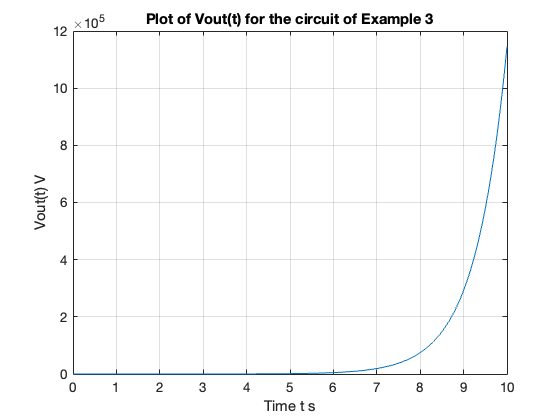

In [11]:
[r, p, k] = residue(2*conv([1,0],[1,3]),[1 8, 10,4])
t=0:0.01:10;
Vout = 1.36.*exp(r(1).*t)...
   +0.64.*exp(real(r(2)).*t).*cos(imag(r(2)).*t)...
   -1.84.*exp(real(r(3)).*t).*sin(-imag(r(3)).*t);
plot(t, Vout); grid
title('Plot of Vout(t) for the circuit of Example 3')
ylabel('Vout(t) V'),xlabel('Time t s')

#### Worked Solution: {ref}`ex:12.3`


File Pencast: [example12_3.pdf](https://cpjobling.github.io/eg-247-textbook/laplace_transform/worked_examples/example3.pdf) - Download and open in Adobe Acrobat Reader.

The attached PDF works through the solution to {ref}`ex:12.3` by hand. It's quite a complex, error-prone (as you will see!) calculation that needs careful attention to detail. This in itself gives justification to my belief that you should use computers wherever possible.

##### Alternative solution using transfer functions

In [12]:
Vout = tf(2*conv([1, 0],[1, 3]),[1, 8, 10, 4])


Vout =


       2 s^2 + 6 s


  ----------------------


  s^3 + 8 s^2 + 10 s + 4


Continuous-time transfer function.



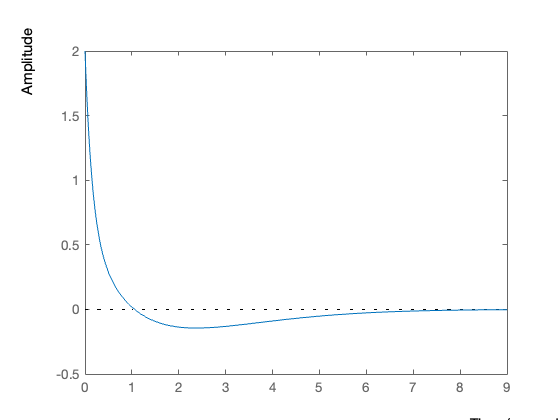

In [13]:
impulse(Vout)

### Example 12.4

Condider {numref}`fig:complex_imp` and give an expression for $V_c(s)$.

**OneNote Class Notebook Scratch Pad**

<pre style="border: 2px solid blue">















</pre>

(ex:12.5)=
### Example 12.5

For the network shown in {numref}`fig:ex12.5`, all the complex impedance values are given in $\Omega$ (ohms). 

![Circuit for example 4](pictures/example4.png)

Find $Z(s)$ using:
    
1. nodal analysis
2. by successive application of parallel and series combination of impedences

#### 1. Solution by nodal analysis

**OneNote Class Notebook Scratch Pad**

<pre style="border: 2px solid blue">















</pre>

#### 2. Solution by by successive application of parallel and series combination of impedences

**OneNote Class Notebook Scratch Pad**

<pre style="border: 2px solid blue">















</pre>

**Solutions**: Pencasts [ex4_1.pdf](https://cpjobling.github.io/eg-247-textbook/laplace_transform/worked_examples/ex4_1.pdf) and [ex4_2.pdf](https://cpjobling.github.io/eg-247-textbook/laplace_transform/worked_examples/ex4_2.pdf) &ndash; open in Adobe Acrobat.

(ex:12.6)=
### Example 12.6 - Do It Yourself

Compute $Z(s)$ and $Y(s)$ for the circuit shown below. All impedence values are in $\Omega$ (ohms). Verify your answers with MATLAB.

![Circuit for Example 5](pictures/example5.png)

####  Solution 12.6 

**OneNote Class Notebook Scratch Pad**
<pre style="border: 2px solid blue">
























</pre>

#### Answer 12.6

$$Z(s) = \frac{65s^4 + 490s^3 + 528s^2 + 400s + 128}{s(5s^2 + 30s + 16)}$$

$$Y(s) = \frac{1}{Z(s)} = \frac{s(5s^2 + 30s + 16)}{65s^4 + 490s^3 + 528s^2 + 400s + 128}$$

Matlab verification: [solution12_6.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/solution12_6.m)

(mat:12.6)=
#### Example 12.6: Verification of Solution

In [14]:
syms s;

z1 = 13*s + 8/s;
z2 = 5*s + 10;
z3 = 20 + 16/s;

In [15]:
z = z1 + z2 * z3 /(z2 + z3)

z =


13*s + 8/s + ((5*s + 10)*(16/s + 20))/(5*s + 16/s + 30)


In [16]:
z10 = simplify(z)

z10 =


(65*s^4 + 490*s^3 + 528*s^2 + 400*s + 128)/(s*(5*s^2 + 30*s + 16))


In [17]:
pretty(z10)

    4        3        2
65 s  + 490 s  + 528 s  + 400 s + 128
-------------------------------------
               2
         s (5 s  + 30 s + 16)



##### Admittance

In [18]:
y10 = 1/z10;
pretty(y10)

               2
         s (5 s  + 30 s + 16)
-------------------------------------
    4        3        2
65 s  + 490 s  + 528 s  + 400 s + 128



## Lab Work

In MATLAB Lab 5, we will explore the tools provided by MATLAB for solving circuit analysis problems.

## Homework

Complete any exercises that were not covered in the class or follow-up examples class. There are a number of related problems in [Solved Problems 3.39](https://www.accessengineeringlibrary.com/content/book/9781260454246/toc-chapter/chapter3/section/section47#ch03fig14)&mdash;3.41 in {cite}`schaum` and in section [4.7 Exercises](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?docID=3384197&ppg=121) in {cite}`karris`. 

Supplementary problems [3.52 and following](https://www.accessengineeringlibrary.com/content/book/9781260454246/toc-chapter/chapter3/section/section48) ({cite}`schaum`) provide opportunities for extra practice.

## Summary

In this section we have looked at the application of the Laplace transform to circuit analysis.

* {ref}`circuit_transforms`

* {ref}`complex_impedance`

* {ref}`complex_admittance`

* {ref}`examples12`

## Take Aways

## Next time

We move on to consider 

* {ref}`unit4.6`

## References

```{bibliography}
:filter: docname in docnames
```

(matlab_solutions12)=
## Matlab Solutions

For convenience, single script MATLAB solutions to the examples are provided and can be downloaded from the accompanying [MATLAB](https://github.com/cpjobling/eg-247-textbook/tree/master/laplace_transform/matlab) folder in the [GitHub repository](https://github.com/cpjobling/eg-247-textbook).

* Solution 3 [[solution3.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/solution3.m)]
* Solution 5 [[solution5.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/solution5.m)]